# 2.1. Data Manipulation
'''
For all modern deep learning frameworks, the tensor class (ndarray in MXNet, Tensor in PyTorch and TensorFlow)
resembles NumPy’s ndarray, with a few killer features added.
The tensor class is the main interface for storing and manipulating data in deep learning libraries.
'''

__Pytorch - Tensor__ 

1. O que é Pytorch e por que escolher Pytorch?

PyTorch é um pacote de computação científica baseado em Python. 
Um substituto do NumPy que pode utilizar o desempenho da GPU para cálculos.

In [2]:
import torch

x = torch.arange(12, dtype=torch.float32)  # Criando um novo tensor com 12 elementos

x.numel()  # We can inspect the total number of elements in a tensor via its numel method.

x.shape #tensor’s shape (the length along each axis)


#We can change the shape of a tensor without altering its size or values, by invoking reshape.
X = x.reshape(3,4) #transform our vector x whose shape is (12,) to a matrix X with shape (3, 4).
# we can place a -1 for the shape component that should be inferred automatically:
# x.reshape(-1, 4)
# x.reshape(3, -1)

In [3]:
torch.zeros((2, 3, 4)) # We can construct a tensor with all elements set to 0 and a shape of (2, 3, 4) via the zeros function.
torch.ones((2, 3, 4)) # Similarly, we can create a tensor with all 1s by invoking ones.

torch.randn(3, 4) #  element randomly, with elements drawn from a standard Gaussian (normal) distribution with mean 0 and standard deviation 1.

torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])  #  Here, we construct a matrix with a list of lists,
# where the outermost list corresponds to axis 0, and the inner list corresponds to axis 1.

X[1, 2] = 17  # Alterando elemento linha 1 coluna 2

X[:2, :] = 12 # accesses the first and second rows


x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [3]:
# Concatenando matrizes:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

X.sum() # Summing all the elements in the tensor yields a tensor with only one element.


tensor(66.)

# 'Append' tensor

In [2]:
import torch

a = torch.tensor([])
b = torch.tensor([1.2])
a = torch.cat((a,b))       # 'a = a + b'


A quantidade de colchetes colocadas no tensor altera sua dimensão:

In [5]:
a=torch.tensor(2) 
print(a.shape)
b=torch.tensor([2]) 
print(b.shape)
c=torch.tensor([[2]])  
print(c.shape)
d=torch.tensor([[[2]]])
print(d.shape)
e=torch.tensor([[[[2]]]])
print(e.shape)

torch.Size([])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1, 1, 1])
torch.Size([1, 1, 1, 1])


In [4]:
# Broadcasting mechanism
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a + b
# Since a and b are 3x1 and 1x2 matrices, respectively, their shapes do not match up.
# Broadcasting produces a larger 3x2 matrix by replicating matrix a along the columns and
# matrix b along the rows before adding them elementwise.

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [5]:
Z = torch.zeros_like(Y)  # .zeros_like impede que Z altere o id
# Usar X = X + Y altera o id.
# Usar X += Y não altera o id.

In [6]:
A = X.numpy()           # Cria o vetor A ndarray (numpy) a partir do tensor X (torch)
B = torch.from_numpy(A) # Cria o tensor B (torch) a partir do vetor A ndarray (numpy)
type(A)  # numpy.ndarray
type(B)  # torch.Tensor

torch.Tensor

In [3]:
a = torch.tensor([3.5])         # To convert a tensor to a Python scalar, we can invoke the item function or Python’s built-in functions.
a, a.item(), float(a), int(a)
# (tensor([3.5000]), 3.5, 3.5, 3)
a.item() # 3.5

3.5

# Convert tensor format

In [9]:
import torch
y = torch.tensor(15)
y.dtype

y = y.to(torch.int8)
y.dtype

torch.int8

In [11]:
# OUTRA OPÇÃO:
y = y.type(torch.bfloat16)
y.dtype

torch.bfloat16

# 2.1.4. Broadcasting

Agora, você sabe como executar operações binárias elementwise em dois tensores do mesmo formato. Sob certas condições, __mesmo quando os formatos diferem, ainda podemos executar operações binárias elementwise invocando o mecanismo de transmissão (Broadcasting)__. 

A transmissão funciona de acordo com o seguinte procedimento de duas etapas: 

- (i) expandir __(reshape)__ um ou ambos os arrays copiando elementos ao longo de eixos com comprimento 1 para que, após essa transformação, os dois tensores tenham o mesmo formato, ou formato que admita a realização de operações;
- (ii) executar uma operação elementwise nos arrays resultantes.

__OBSERVAÇÃO: O Broadcasting é automático para as bibliotecas numpy e torch.__

Exemplo:



In [9]:
import torch

A = torch.arange(3)
B = torch.arange(2)
A,B

(tensor([0, 1, 2]), tensor([0, 1]))

In [6]:
A + B

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

Aplicando Broadcasting (reshape):

In [8]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [10]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

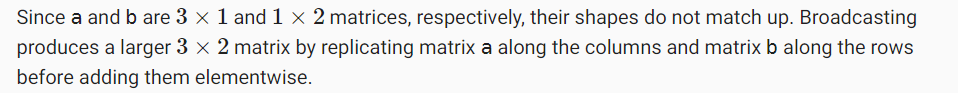

---------------

----------------

O mecanismo de broadcasting no Python (mais especificamente na biblioteca NumPy (e tb torch)) permite que operações aritméticas sejam realizadas em arrays de diferentes formas (ou dimensões) sem a necessidade de duplicar dados. Ele automatiza a extensão dos arrays menores para que tenham o mesmo tamanho dos arrays maiores, simplificando cálculos.

- Objetivo:
O broadcasting permite que você aplique operações como soma, subtração, multiplicação e divisão entre arrays de diferentes dimensões, sem precisar explicitamente redimensioná-los. Isso economiza memória e melhora a eficiência do código.

Regras de Broadcasting:
1. Se os arrays possuem formas diferentes, o NumPy automaticamente "expande" os arrays menores para que tenham formas compatíveis.
2. O broadcasting segue essas regras:
- Se os tamanhos de dois eixos são iguais, eles são compatíveis.
- Se um dos eixos tem tamanho 1, ele é "esticado" para o tamanho do outro eixo.
- Se os eixos têm tamanhos diferentes e nenhum é 1, eles são incompatíveis, e o NumPy lança um erro.

Exemplo:

Considere um array de forma (3, 1) e outro de forma (1, 4):

In [11]:
import numpy as np

a = np.array([[1], [2], [3]])  # Forma (3, 1)
b = np.array([4, 5, 6, 7])     # Forma (1, 4)

# Soma utilizando broadcasting
result = a + b
print(result)


[[ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]]


Aqui, o array __a__ foi "expandido" de (3, 1) para (3, 4), e o array __b__ foi expandido de (1, 4) para (3, 4), permitindo que a soma fosse realizada de maneira eficiente.



In [12]:
a

array([[1],
       [2],
       [3]])

In [13]:
b

array([4, 5, 6, 7])

Vetores __a__ e __b__ não poderiam ser somados por possuirem dimensões diferentes. Então as bibliotecas numpy e torch aplicam a técnica automática de redimensionamento dos vetores para realizar operações.

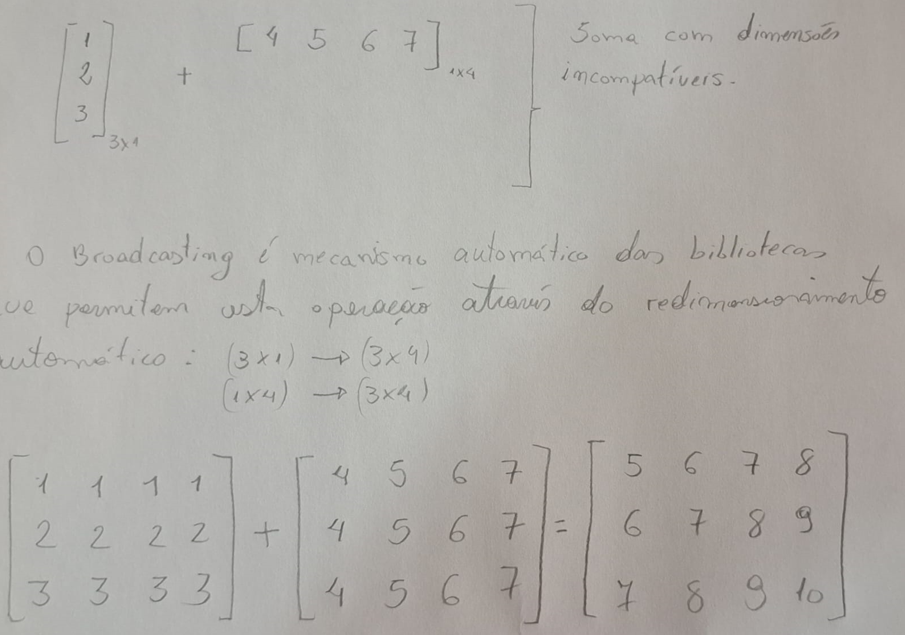

In [14]:
import torch

a = torch.tensor([[1], [2], [3]])  # Forma (3, 1)
b = torch.tensor([4, 5, 6, 7])     # Forma (1, 4)

# Soma utilizando broadcasting
result = a + b
print(result)


tensor([[ 5,  6,  7,  8],
        [ 6,  7,  8,  9],
        [ 7,  8,  9, 10]])
